# Covariance of variables in a time series of measurements
using the data file _weathergraz.txt_, which contains measurements of the duration of sunshine over a month in the morning and afternoon (in hours) taken at the weather station of the University of Graz in 1961.

* a. First we read the data in and create a plot of afternoon vs. morning sunshine hours.

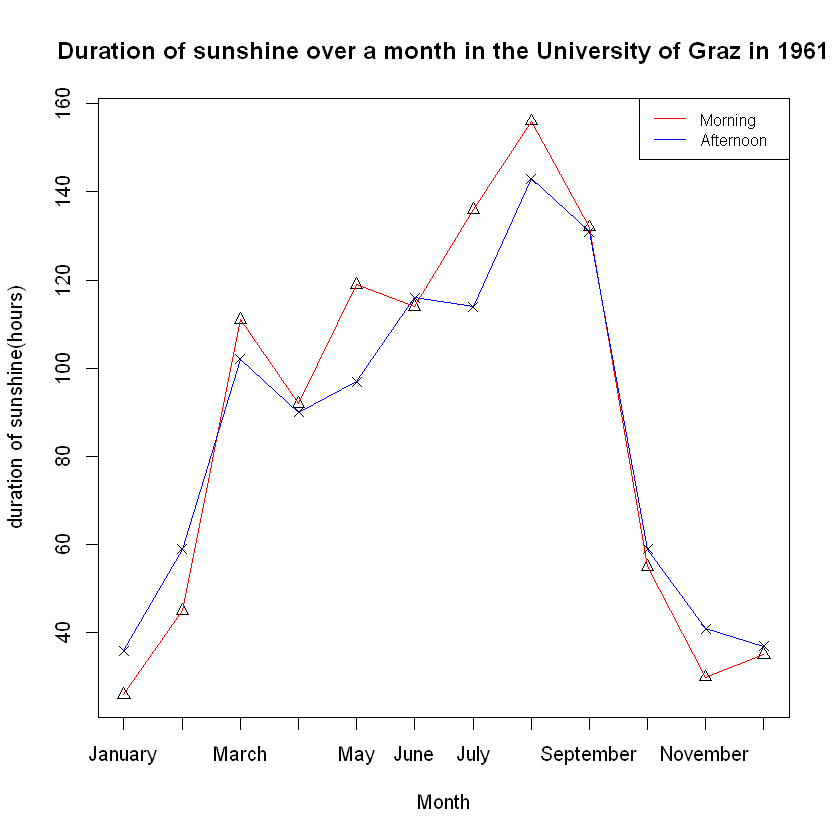

In [1]:
hours <- read.table("weathergraz.txt", header = TRUE, row.names = 1)
vorm <- hours[,1]
nachm <- hours[,2]
plot(1:12, vorm, pch = 2, xlab="Month", ylab="duration of sunshine(hours)",xaxt="n", main="Duration of sunshine over a month in the University of Graz in 1961")
points(1:12, nachm, pch = 4, xlab="Month", ylab="duration of sunshine(hours)",xaxt="n")
lines(1:12, vorm, col="red")
lines(1:12, nachm, col="blue")
axis(1,at=1:12,labels=rownames(hours))
legend("topright", legend=c("Morning", "Afternoon"),col=c("red", "blue"), lty=1:1, cex=0.8)

In [2]:
cat("the covariance matrix between morning to afternoon sunshine hours: ")
matrix(c(var(vorm),cov(vorm, nachm),cov(vorm, nachm), var(nachm)),2,2)
cat("the correlation coefficient = ", cor(vorm, nachm))

the covariance matrix between morning to afternoon sunshine hours: 

2181.720,1732.826
1732.826,1430.083


the correlation coefficient =  0.981013

The way we estimated the covariance matrix doesn't give an unbiased estimate of the underlying true covariance of the “sunshine population”. Because they are not random variables. 

# Performance of Monte Carlo integration in different dimensions

We would like to compare the performance of the Monte Carlo integration technique with the regular midpoint method. To this end, consider the integral 
$$ I = \int_V f(\boldsymbol{x})d\boldsymbol{x} $$
where the integration domain V is a d-dimensional hypercube with $0 ≤ x_i ≤ 1$ for each component of the vector $x = (x_1, x_2,..., x_d)$. The function we want to integrate is given by
$$f(\boldsymbol{x})=\prod_{i=1}^d \frac{3}{2}(1-x_i^2)$$
This has an analytic solution of course, which is $<f>= I = 1$ independent of d and $<f^2>= (6/5)^d$,but we want to ignore this for the moment and use the problem as a test of the relative performance of Monte Carlo integration and ordinary integration techniques. To this end, calculate the integral in dimensions $d = 1, 2, 3, . . . , 10$, using

* a: the midpoint method with the help of _xmidpoints.R_, where you divide the volume into a set of much smaller hypercubes obtained by subdividing each axis into n intervals, and where you approximate the integral by evaluating the function at the centers of the small cubes. Be aware that one can very easily fill up the whole computer memory with it. So, handle the number of dimensions with care! Alternative, think about a way of splitting the integration into smaller pieces.


* b: standard Monte Carlo integration in d dimensions, using N random vectors

For definiteness, adopt $n = 6$ and $N = 20000$. For both of the methods, report the numerical result for I, estimated uncertainty, and the CPU-time needed for each of the dimensions $d = 1, 2, . . . , 10$. (If you manage, you can also go to higher dimension. If you run into memeory problems stop at dimension smaller than 10.)

In [4]:
# integrand
fx <- function(x){
    # x is a matrix
    return(apply(3*(1-x^2)/2, 1, prod))
}
# midpoint method
xmidpoints <- function(n,dim) {
  # n:   number of points per dimension (>= 1)
  # dim: number of dimension            (>= 1)
  # returns a (2D) of matrix(n^dim, dim) x
  # located at midpoints of a unit hypercube
  n1 <- n^dim
  ii <- matrix(nrow=n1,ncol=dim)
  d  <- 0:(n1-1)
  for (j in 0:dim-1) ii[,j+1]<-(d%/%(n^j)) %% n 
  ii <- ii/as.double(n) + 1.0/as.double(2.0*n) # shift to midpoint
  return(ii)
}
# integral
integ <- function(n, dim){
    return(sum(fx(xmidpoints(n, dim)))/n^dim)
}
for (i in 1:8){
    start_time <- Sys.time()
    cat("the integral I for", i, "dimension is", integ(6, i), "\n")
    end_time <- Sys.time()
    cat("the consumed CPU-time is", end_time - start_time, "s\n")
}

the integral I for 1 dimension is 1.003472 
the consumed CPU-time is 0.05384278 s
the integral I for 2 dimension is 1.006957 
the consumed CPU-time is 0.03589582 s
the integral I for 3 dimension is 1.010453 
the consumed CPU-time is 0.001002073 s
the integral I for 4 dimension is 1.013961 
the consumed CPU-time is 0.007976055 s
the integral I for 5 dimension is 1.017482 
the consumed CPU-time is 0.03788996 s
the integral I for 6 dimension is 1.021015 
the consumed CPU-time is 0.284512 s
the integral I for 7 dimension is 1.02456 
the consumed CPU-time is 0.524749 s
the integral I for 8 dimension is 1.028118 
the consumed CPU-time is 3.449731 s


In [5]:
# standard Monte Carlo
N <- 20000
for (n in 1:10){
    start_time <- Sys.time()
    x <- matrix(runif(N*n), N, n)
    cat("the integral I for", n, "dimension is", mean(fx(x)), "\n")
    # we could also calculte variance and compare to analytical results here
    end_time <- Sys.time()
    cat("the consumed CPU-time is", end_time - start_time, "s\n")
}

the integral I for 1 dimension is 0.9976579 
the consumed CPU-time is 0.05186415 s
the integral I for 2 dimension is 0.9998751 
the consumed CPU-time is 0.02795196 s
the integral I for 3 dimension is 0.9992948 
the consumed CPU-time is 0.02792788 s
the integral I for 4 dimension is 0.9953377 
the consumed CPU-time is 0.04886794 s
the integral I for 5 dimension is 0.9971796 
the consumed CPU-time is 0.03088808 s
the integral I for 6 dimension is 1.007829 
the consumed CPU-time is 0.02695298 s
the integral I for 7 dimension is 1.007801 
the consumed CPU-time is 0.04787803 s
the integral I for 8 dimension is 0.9985295 
the consumed CPU-time is 0.03291011 s
the integral I for 9 dimension is 0.9800618 
the consumed CPU-time is 0.03094792 s
the integral I for 10 dimension is 0.9892015 
the consumed CPU-time is 0.05083418 s


For the MC integration in 1d case we can estimate the variance as $$\sigma_{I}=\sqrt{\frac{<f^2>-<f>^2}{N}}=\frac{0.2}{\sqrt N}$$